# Technical TASK 1 :- Prediction using Unsupervised ML
In this task, we will redict the optimum number of clusters and represent it visually from the given ‘Iris’ dataset. Use R or Python or perform this task.

Task Completed for The Sparks Foundation Internship Program Data Science & Business Analytics Internship Task_2

# AUTHOR:SAMEEMA TARIQ

# #GRIPMAY21

# Importing Libraries

In [80]:
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Importing Dataset

In [81]:
d_iris=datasets.load_iris()
df=pd.DataFrame(d_iris.data, columns=d_iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Data PreProcessing

In [82]:
cols=df.columns[df.isnull().any()].tolist()
df[cols]=df[cols].fillna(df.mean())

# The Elbow Method

Text(0, 0.5, 'Sum of Squared Distance')

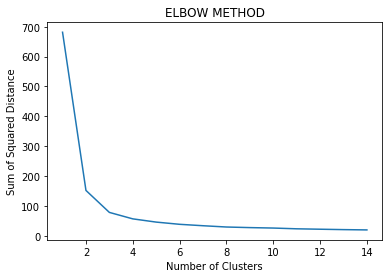

In [87]:
dataPoints=df.iloc[:,[0,1,2,3]].values


#Calculating Sum of Squared Eucalidean Distances
SSD=[]
for cls in range (1,15):
    model=KMeans(n_clusters=cls, init='k-means++', n_init=10, max_iter=300, random_state=0)
    model.fit(dataPoints)
    SSD.append(model.inertia_)

#plotting Elbow Method
plt.plot(range (1,15),SSD)
plt.title('ELBOW METHOD')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distance')

The graph shows that optimal number of cluster is 3

# Prediction based upon optimal number of clusters

In [88]:
model=KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmean=model.fit_predict(dataPoints)

# Data Visualization

Text(0.5, 1.0, 'Visualization of Iris data')

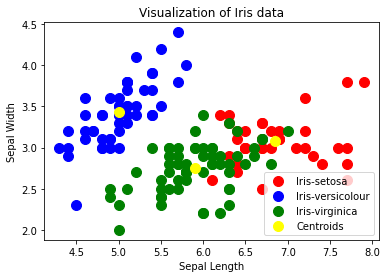

In [89]:

plt.scatter(dataPoints[kmean == 0, 0], dataPoints[kmean == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(dataPoints[kmean == 1, 0], dataPoints[kmean == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(dataPoints[kmean == 2, 0], dataPoints[kmean == 2, 1], 
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Visualization of Iris data')